In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [19]:
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv').drop(columns='customerID', axis=1)
data = data[~data['TotalCharges'].isin([' ', '', '  '])]
data[['MonthlyCharges', 'TotalCharges']] = data[['MonthlyCharges', 'TotalCharges']].astype(float)
data.info()
 

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [20]:
label_ = LabelEncoder()

data = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]
for i in text_data_features :
    data[i] = label_.fit_transform(data[i])
    print(i,' : ', data[i].unique(),' = ', label_.inverse_transform(data[i].unique()))


gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [21]:
X = data.drop(columns=['Churn'])
y = data['Churn'] 

In [22]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [23]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

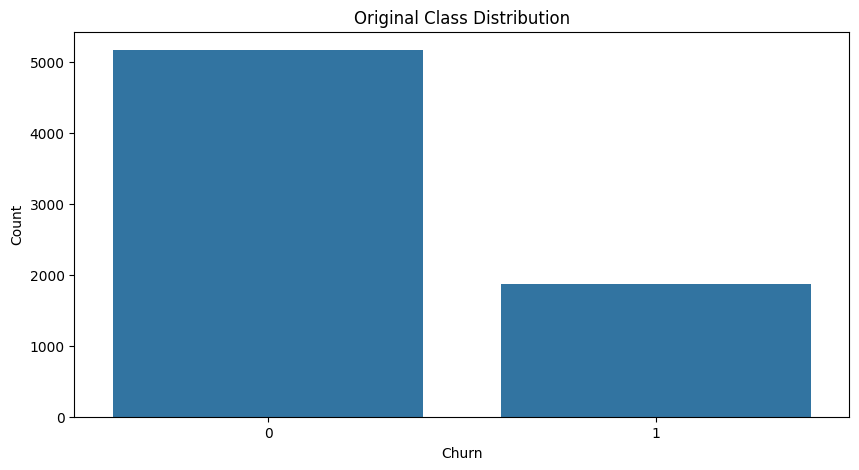

In [24]:
# Countplot for original data
plt.figure(figsize=(10, 5))
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

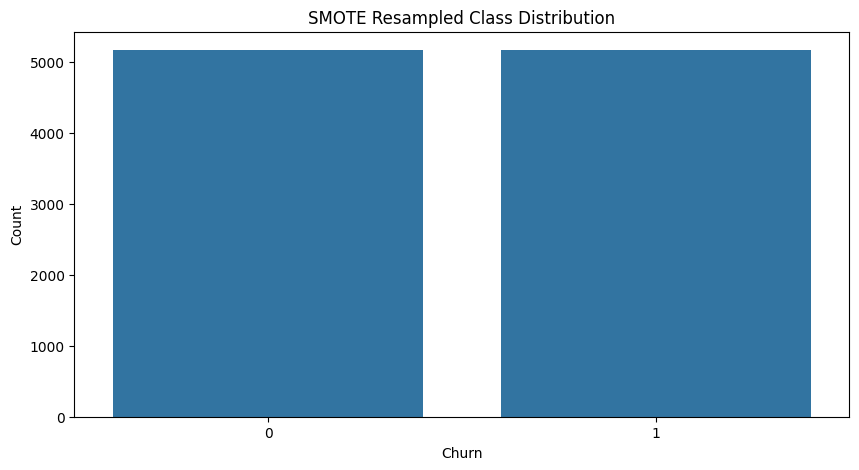

In [25]:
# Countplot for SMOTE-resampled data
plt.figure(figsize=(10, 5))
sns.countplot(x=y_resampled)
plt.title("SMOTE Resampled Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

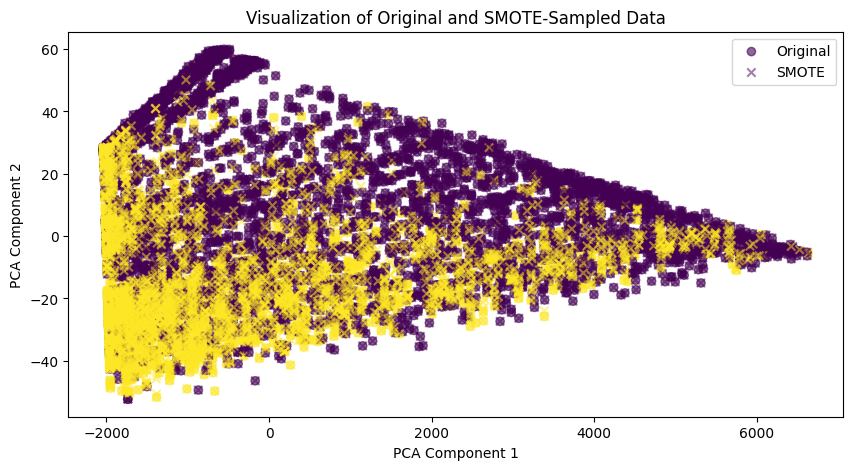

In [26]:
from sklearn.decomposition import PCA

# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
X_resampled_pca = pca.fit_transform(X_resampled)
X_pca = pca.transform(X)

# Plot original data points
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.6, label='Original')

# Plot SMOTE-resampled data points
plt.scatter(X_resampled_pca[:, 0], X_resampled_pca[:, 1], c=y_resampled, marker='x', alpha=0.5, label='SMOTE')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.title("Visualization of Original and SMOTE-Sampled Data")
plt.show()

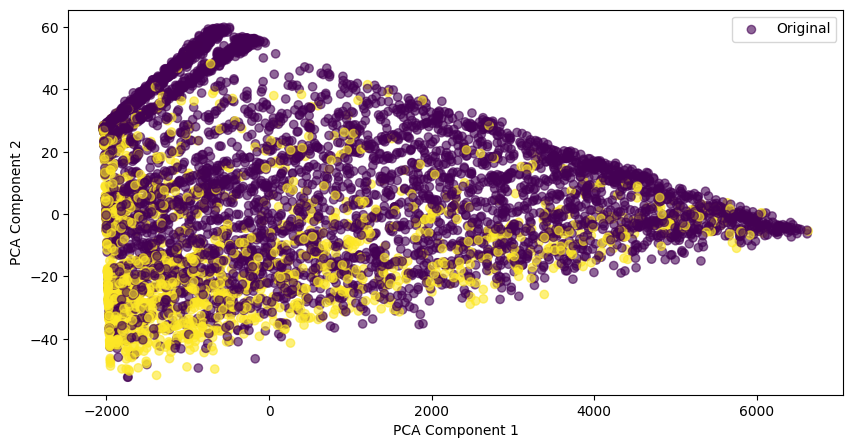

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.6, label='Original')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

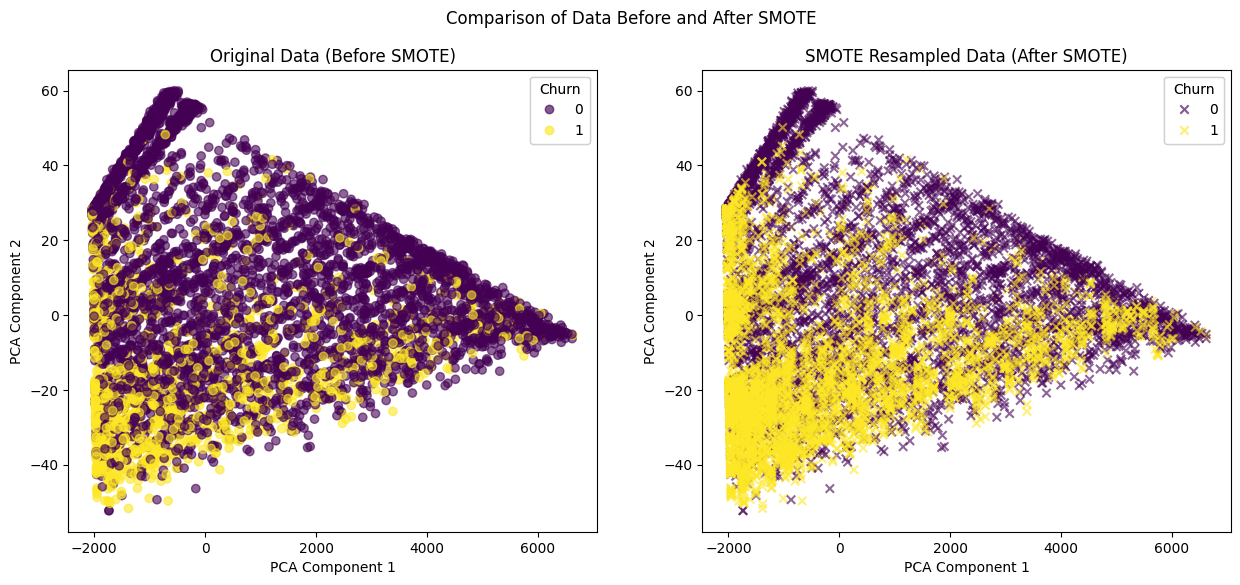

In [29]:
# Set up subplots to compare before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the original data (before SMOTE)
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.6, cmap='viridis')
axes[0].set_title("Original Data (Before SMOTE)")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")
legend1 = axes[0].legend(*scatter1.legend_elements(), title="Churn")
axes[0].add_artist(legend1)

# Plot the resampled data (after SMOTE)
scatter2 = axes[1].scatter(X_resampled_pca[:, 0], X_resampled_pca[:, 1], c=y_resampled, alpha=0.6, cmap='viridis', marker='x')
axes[1].set_title("SMOTE Resampled Data (After SMOTE)")
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Churn")
axes[1].add_artist(legend2)

# Display the plots
plt.suptitle("Comparison of Data Before and After SMOTE")
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# stacking
base_estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'gb__n_estimators': [50, 100],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'final_estimator__C': [0.1, 1, 10]
}

def model_optimize(Result_CLF, param_list, scoring_method):
    random_search = RandomizedSearchCV(estimator=Result_CLF, param_distributions=param_list, 
                                        n_iter=20, cv=5, scoring=scoring_method, # the scoring method can be chosen from accuracy to F1-score/recall
                                        random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    return random_search

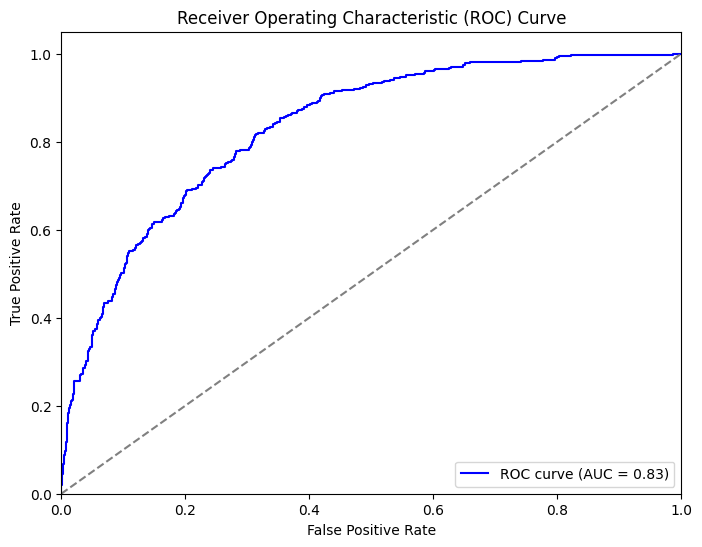

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


optimized_model = model_optimize(stacking_clf, param_grid, 'recall')

# Predict probabilities on the test set
y_probs = optimized_model.predict_proba(X_test)[:, 1]  # get the probability for the positive class
y_pred = optimized_model.predict(X_test)

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)  # Y_test is the true labels
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()